In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Learning about data

In [ ]:
# import dataset  
data = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
data.head()

In [ ]:
# information about data
data.info()

__observation(obv)__ 
1) There are 50,000 entries in dataset \
2) There are two features __review__ and __sentiment__ \
3) Both features are __Object__ so they are basically __"text"__ \
4) Both features have 50K data in there respective column, so no __null__ value(i.e. there are no empty rows in features)

In [ ]:
# checking for null values
data.isnull().sum()

In [ ]:
# checking for number of sentiment in sentiment column
data.sentiment.value_counts()

In [ ]:
# checking if there are same review multiple time
data.review.value_counts().head(2)

In [ ]:
# checking how many duplicate valu there are?
data.duplicated().value_counts()

## Data Cleaning

In [ ]:
# sampling 30000 data
# data = data.sample(30000)

In [ ]:
# checking for missing value and balance in sampled data
# data.shape, data.info(), data.sentiment.value_counts()

In [ ]:
# droping duplicate values from data
data.drop_duplicates(inplace=True)

In [ ]:
# cheking duplicated values after droping
data.duplicated().value_counts()

In [ ]:
# checking the first line of review
data.review[0]

In [ ]:
# importing libraries for cleanning text
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup

# function to clean whole text
def clean_review(review, stemmer = PorterStemmer(), stop_words = set(stopwords.words("english"))):
    #removing html tags from reviews
    soup = BeautifulSoup(review, "html.parser")
    no_html_review = soup.get_text().lower()
    
    # empty list for adding clean words
    clean_text = []
    # cleaning stopwords and not alpha characters
    for word in review.split():
        if word not in stop_words and word.isalpha():
            clean_text.append(stemmer.stem(word))
        
    return " ".join(clean_text)

In [ ]:
# cleaning whole review of dataset
%time
data.review = data.review.apply(clean_review)

In [ ]:
#checking the clean review in specific locaion
data.review.iloc[3537]

In [ ]:
# how the data looks like now
data

## Vectorizer

In [ ]:
# verctorizing reviews 
#import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# setting max_features to 5000 to get most repeated 5000 words in reviews
cv = CountVectorizer(max_features=5000)

In [ ]:
# Fitting countvectorizer in data.review and getting X for ML
X = cv.fit_transform(data.review).toarray()

In [ ]:
#checking shape of out features(X)
X.shape

In [ ]:
#Importing label encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

# positive = 1, negative = 0
data.sentiment = lb.fit_transform(data.sentiment)

In [ ]:
# extracting the last column sentiment in y
y = data.iloc[:,-1].values

In [ ]:
# checking the shape of our target(y)
y.shape

## Model Building

In [ ]:
# importing train test split
from sklearn.model_selection import train_test_split

# converting X, y into train test split
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data.sentiment)


In [ ]:
# importing naivebayes model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()

# training naive_bayes model with training set
clf1.fit(train_X, train_Y)
clf2.fit(train_X, train_Y)
clf3.fit(train_X, train_Y)

In [ ]:
# predicting value for test set by all model
predict1 = clf1.predict(test_X)
predict2 = clf2.predict(test_X)
predict3 = clf3.predict(test_X)

In [ ]:
# for accuracy score
from sklearn.metrics import accuracy_score

print("Gaussin NaiveBayes:", accuracy_score(predict1, test_Y))
print("Multinomial NaiveBayes:", accuracy_score(predict2, test_Y))
print("Benouli NaiveBayes:", accuracy_score(predict3, test_Y))

We can see that Multinomial NB gives best accuracy, so we will use it to get prediction for our input text.

## Testing

In [ ]:
def vectorizer(data):
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.preprocessing import LabelEncoder
    lb = LabelEncoder()
    cv = CountVectorizer(max_features=5000)
    X = cv.fit_transform(data.review).toarray()
    data.sentiment = lb.fit_transform(data.sentiment)
    y = data.iloc[:,-1].values
    
    return X, y
    

def steming(review, stemmer = PorterStemmer()):
    stem_word = []
    for i in review.split():
        stem_word.append(stemmer.stem(i))
    
    return stem_word

def make_vector(value):
    input_vector = np.zeros(5000)
    for i in range(len(value)):
        if value[i] in features_dict:
            input_vector[features_dict[value[i]]] = 1 + input_vector[features_dict[value[i]]]
    
    input_vector = input_vector.reshape(1,-1)
    return input_vector

def naive_bayes_model(X, y):
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.model_selection import train_test_split
    
    train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data.sentiment)
    clf = MultinomialNB()
    clf.fit(train_X, train_Y)
    return clf

def prediction(clf, input_vector):
    predict = clf.predict(input_vector)
    return predict

In [ ]:
a = "this a wonderful day to be alive"

X, y = vectorizer(data)
a = steming(a)
a = make_vector(a)
model = naive_bayes_model(X, y)
predict = prediction(model, a)

In [ ]:
if predict[0] == 0:
    print("the above mentioned sentence is negative")
else:
    print("the above mentioned sentence is Positive")

## Deployment

In [ ]:
# creating a features dictionary so that we can track the word by its numbers
features_dict = {}
for i in range(len(cv.get_feature_names())):
    features_dict[cv.get_feature_names()[i]] = i



now create a main.py folder to deploy in streamlit. Install streamlit package and other important packages inside main.py

In [ ]:
# import pickle
import pickle

In [ ]:
# making portable features pickle file to transport
pickle.dump(data, open("dataframe.pkl", "wb"))

In [ ]:
# making portable dictionary of features
pickle.dump(features_dict, open("features_dict.pkl", "wb"))

Now by dumping using pickle download all the files. To download go to top right arrow -> output -> /kaggle/working.

After that execute the bellow code in main.py

In [ ]:
'''
import streamlit as st
import pickle
import sklearn
from nltk.stem.porter import PorterStemmer
import numpy as np

# extract the sentiment dataset from
data = pickle.load(open("dataframe.pkl", "rb"))
# extract the most repeated 5000 word dictionary
features_dict = pickle.load(open("features_dict.pkl", "rb"))


#making vectorizer for main.py
def vectorize(dataframe):
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.preprocessing import LabelEncoder
    lb = LabelEncoder()
    cv = CountVectorizer(max_features=5000)
    X = cv.fit_transform(dataframe.review).toarray()
    data.sentiment = lb.fit_transform(dataframe.sentiment)
    y = data.iloc[:, -1].values

    return X, y

# making stemming function for input review
def stemming(review, stemmer=PorterStemmer()):
    stem_word = []
    for i in review.split():
        stem_word.append(stemmer.stem(i))

    return stem_word

# making a numpy arrray to store our review in form of bag of words
def make_vector(value):
    input_vector = np.zeros(5000)
    for i in range(len(value)):
        if value[i] in features_dict:
            input_vector[features_dict[value[i]]] = 1 + input_vector[features_dict[value[i]]]

    input_vector = input_vector.reshape(1, -1)
    return input_vector

# creating function to deploy naive_bayes model and get prediction
def naive_bayes_model(x, y, input_vector):
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.model_selection import train_test_split

    train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.2, random_state=42, stratify=data.sentiment)
    clf = MultinomialNB()
    clf.fit(train_X, train_Y)
    predict = clf.predict(input_vector)
    return predict


# title of our steamlit page
st.title("Sentiment analysis")

# Creating input box for movies name
container = st.container()
selected_text = container.text_input("What's on you mind?")
container.write(selected_text)

# executing series of code to make prediction
a = stemming(selected_text)
a = make_vector(a)
X, y = vectorize(data)
model = naive_bayes_model(X, y, a)

# checking if our input is positive or negative
if model[0] == 1:
    container.write(f"You are Positive")
    container.write("( ͡° ͜ʖ ͡°)")
elif model[0] == 0:
    container.write(f"You are negative")
    container.write("¯\_(ツ)_/¯")

    
'''

## Final result:

### landing :
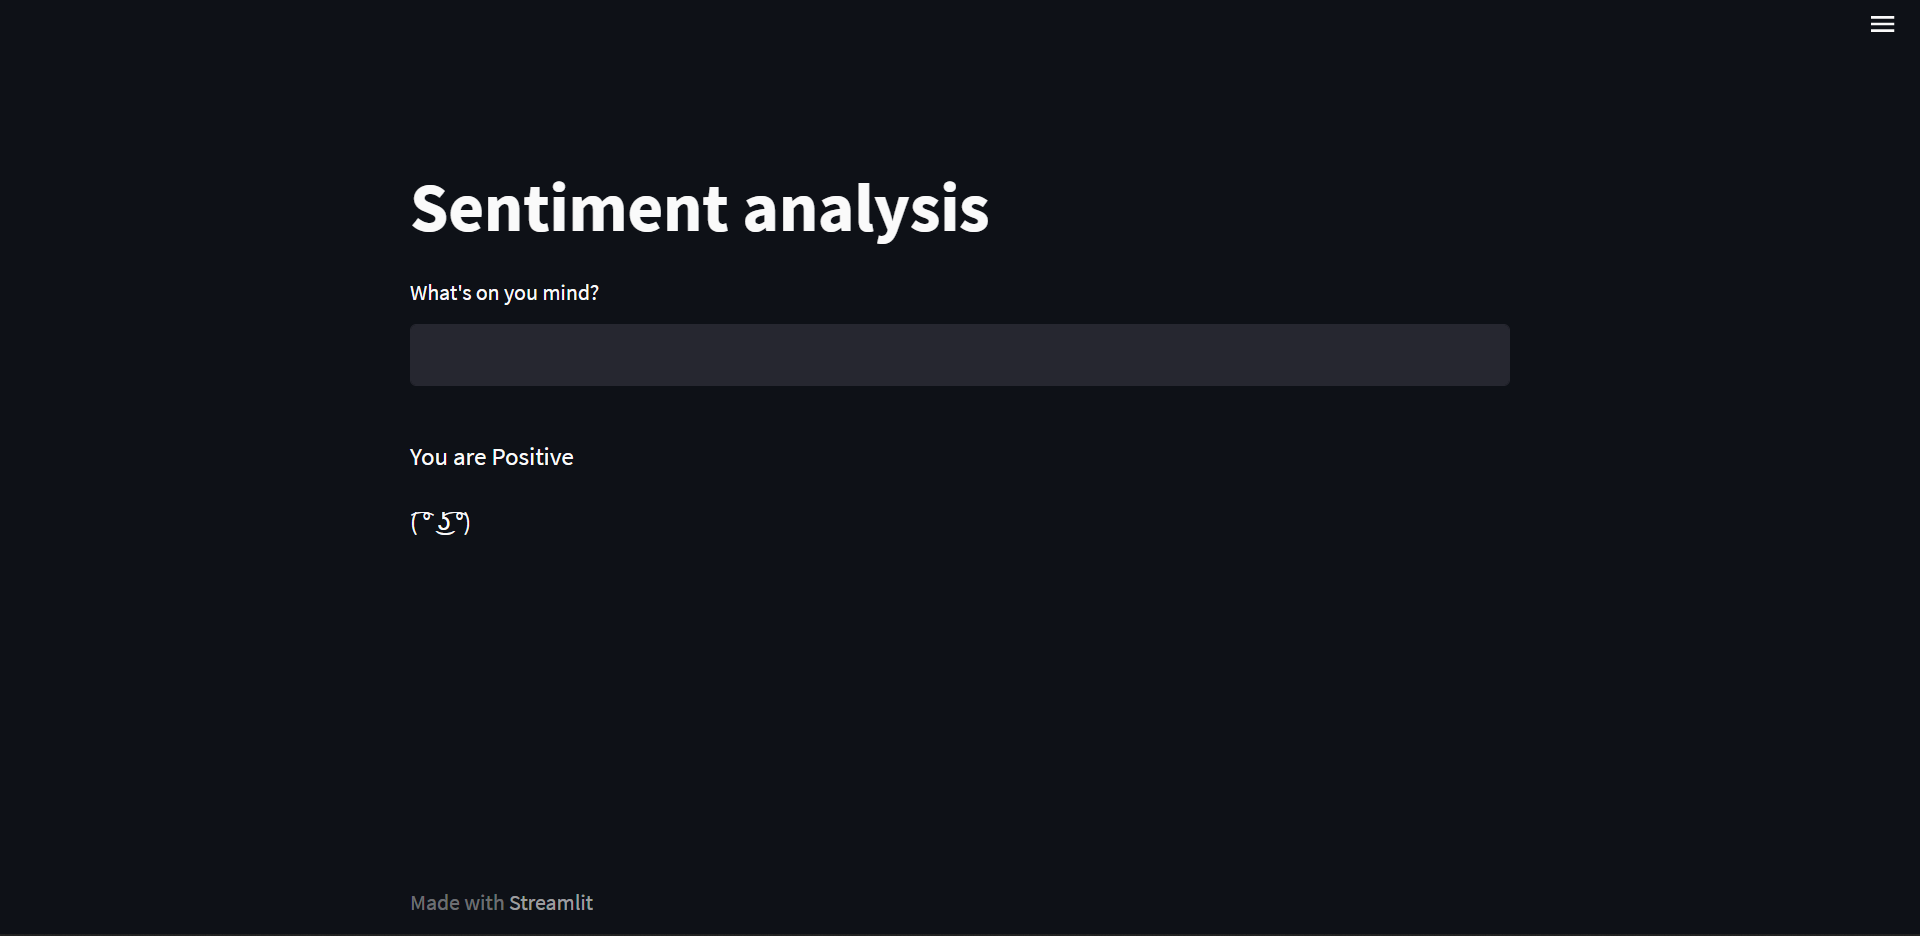

### for postive review:
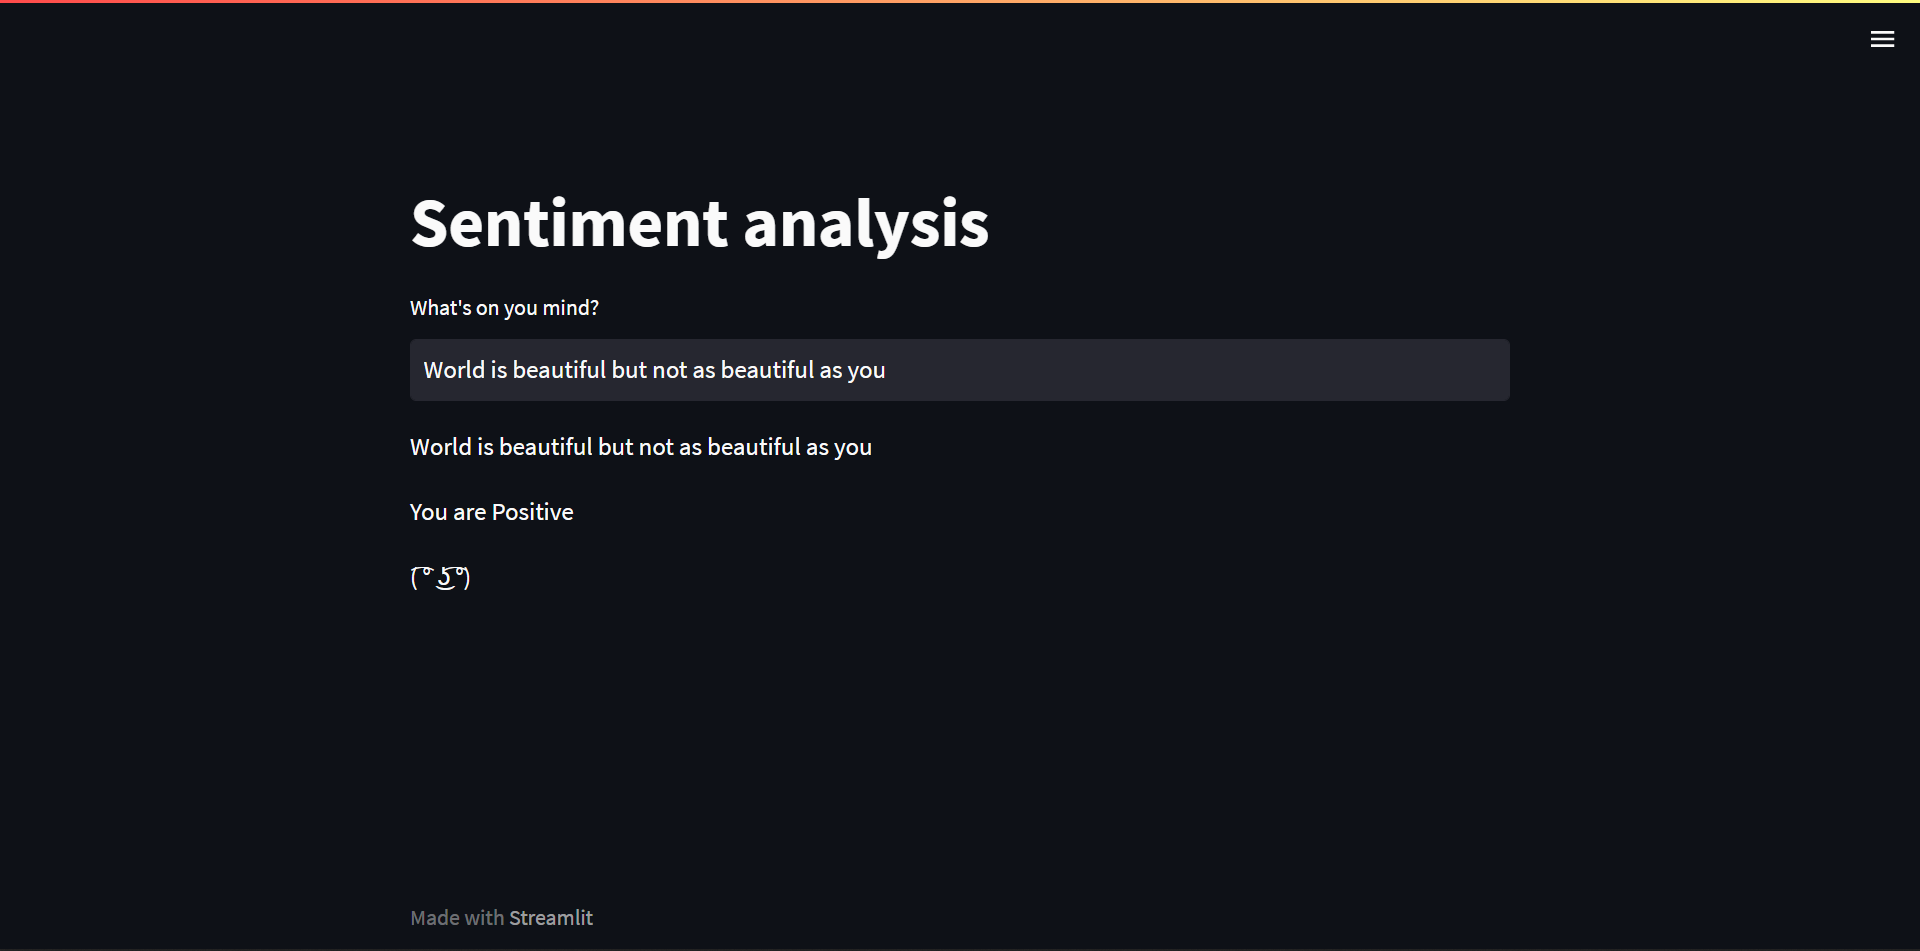

### for negative review:
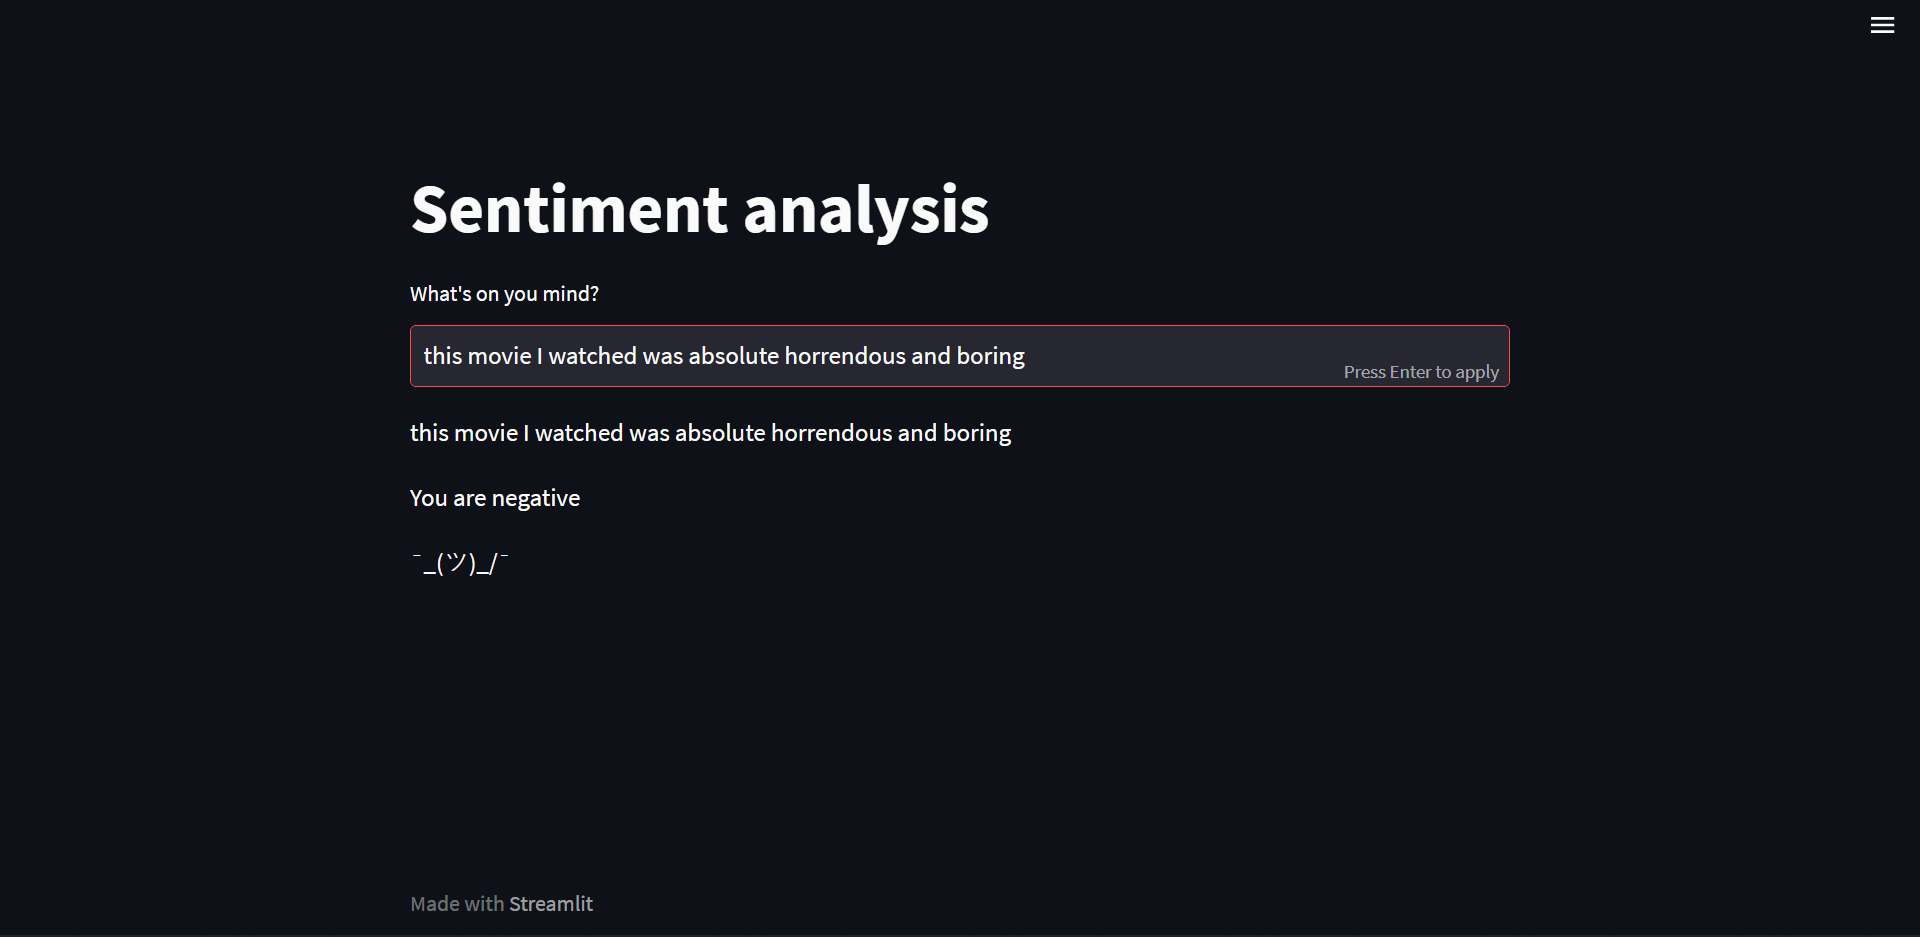